# Data Science and Business Analytics Internship

# The Sparks Foundation

### Author : Pruthviraj Chavan

## Task 2 : Prediction using Unsupervised ML

#### Dataset available here https://bit.ly/3kXTdox

### Q. From the given ‘Iris’ dataset, predict the optimum number of clustersand represent it visually.

## Importing necessary libraries

In [4]:
# Importing filterwarnings to ignore warning messages
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from matplotlib import style
#style.use('dark_background')
plt.style.use('seaborn-dark')

import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# To perform K-means clustering
from sklearn.cluster import KMeans

## Reading the data

In [5]:
iris = pd.read_csv("c:/Users/Pruthvi/Documents/GRIP/Task-2_Prediction_using_Unsupervised_ML/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#summary of all the numeric columns in the dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
##Determining the number of rows and columns
iris.shape

(150, 6)

In [8]:
#D atatypes of each column
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## <font color = red> Checking for null values

In [9]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## <font color = green> No null values encountered

In [10]:
iris.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## Data Visualization

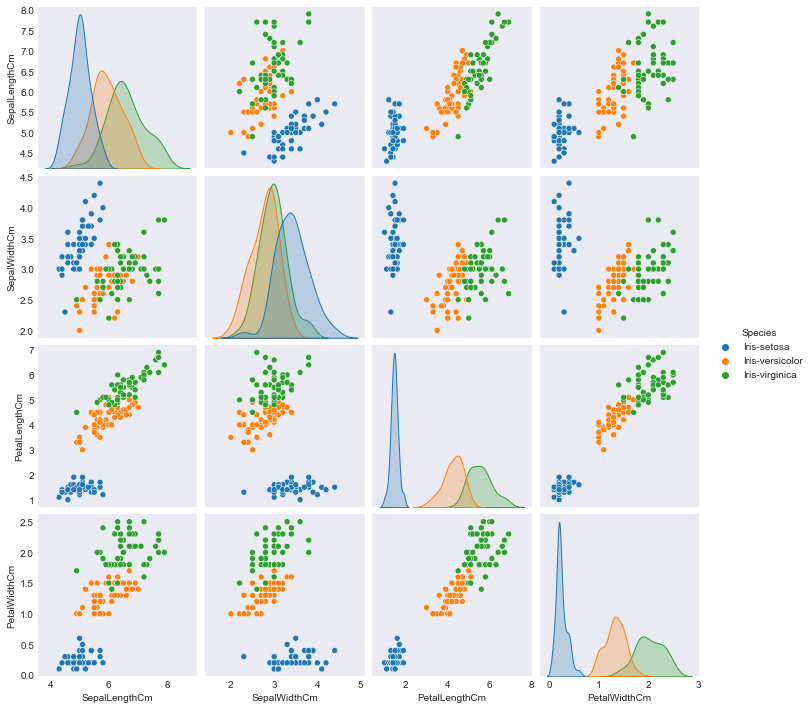

In [11]:
tmp = iris.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species')
plt.show()

- <font color=green> After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in blue) is distinctly different from those of the other two species.
- <font color=green>There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).


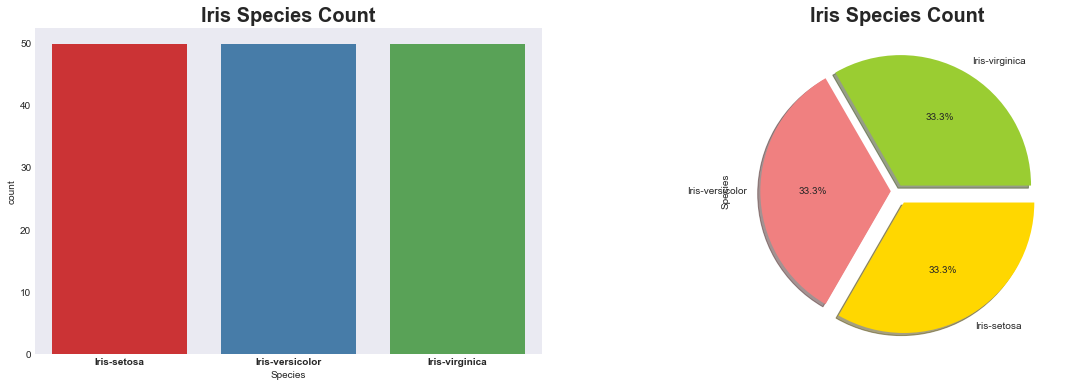

In [12]:
plt.figure(figsize=(20, 6))

cols = ['yellowgreen', 'lightcoral','gold']
plt.subplot(1,2,1)
sns.countplot('Species',data=iris, palette='Set1')
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")
plt.subplot(1,2,2)
iris['Species'].value_counts().plot.pie(explode=[0.05,0.05,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")
plt.show()

- <font color=green>Here the frequency of the observation is plotted.In this case we are plotting the frequency of the three species in the Iris Dataset
- <font color=green> We can see that there are 50 samples each of all the Iris Species in the data set.

<Figure size 864x720 with 0 Axes>

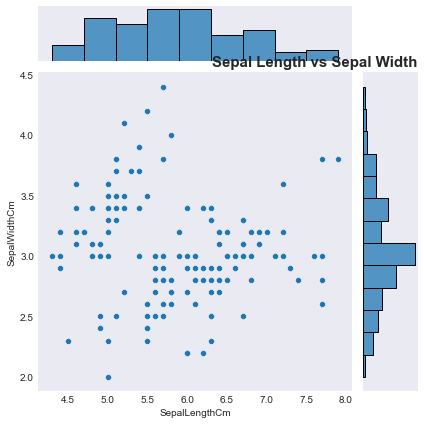

In [13]:
plt.figure(figsize=(12,10))
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris)
plt.title('Sepal Length vs Sepal Width',fontweight="bold", size=15, loc='right')
plt.show()

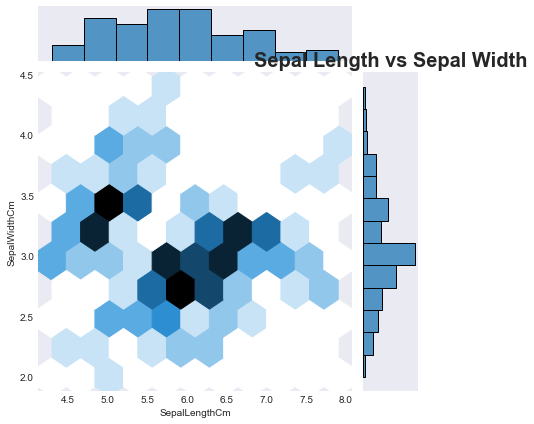

In [14]:
fig=sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',kind='hex',data=iris)
plt.title('Sepal Length vs Sepal Width',fontweight="bold", size=20)
plt.show()

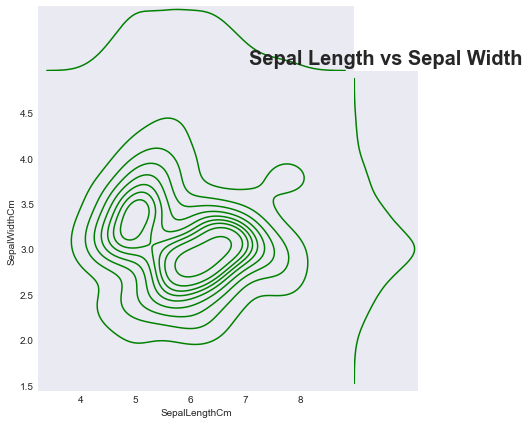

In [15]:
sns.jointplot("SepalLengthCm", "SepalWidthCm", data=iris, kind="kde",space=0,color='g')
plt.title('Sepal Length vs Sepal Width',fontweight="bold", size=20)
plt.show()

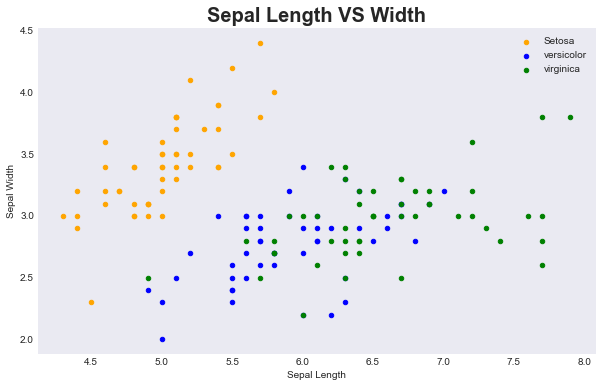

In [16]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width", fontweight='bold',size=20)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

<font color=green>We can clearly see that sepal characteristics differentiate setosa but not versicolor and virginica

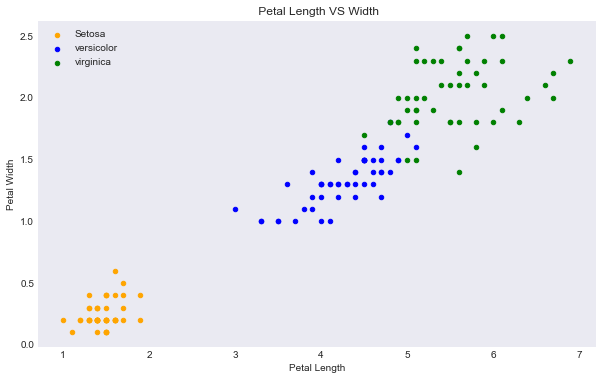

In [17]:
fig =iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

<font color=green>With Petal characteristics we can easily classify the species but there is a little thin line between the virginica and versicolor

### Let's take a look at the Probability Density

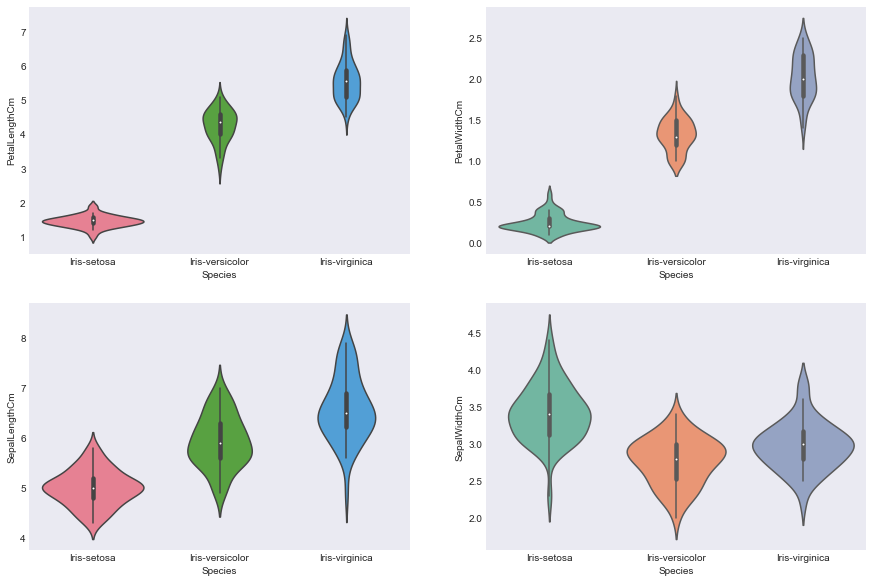

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris,palette='husl')
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris, palette='Set2')
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris,palette='husl')
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris,palette='Set2')
plt.show()

<font color = green>The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density


## Heatmap

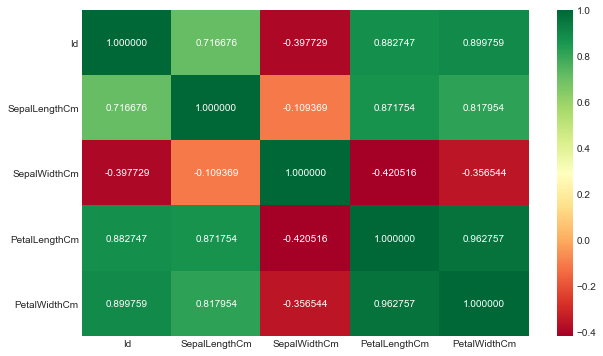

In [19]:
plt.figure(figsize=(10,6)) 
sns.heatmap(iris.corr(),annot=True,fmt="f",cmap="RdYlGn")
plt.show()

In [20]:
iris.drop('Species', axis =1, inplace = True)

In [21]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [22]:
feature = iris.columns[1:]
for i in enumerate(feature):
    print(i)

(0, 'SepalLengthCm')
(1, 'SepalWidthCm')
(2, 'PetalLengthCm')
(3, 'PetalWidthCm')


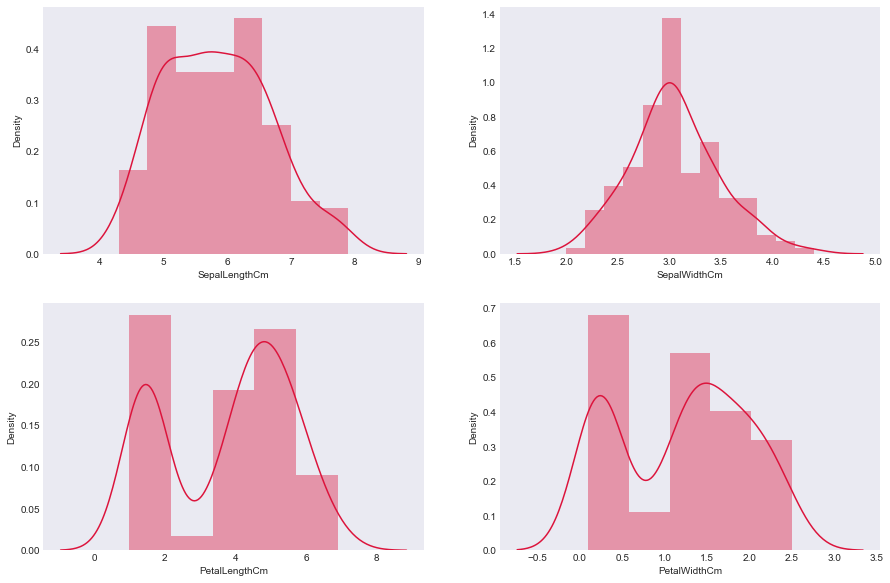

In [23]:
plt.figure(figsize = (15,10))
feature = iris.columns[1:]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(iris[i[1]],color='crimson')

- <font color = green> We can see that Sepal Length and Sepal Width columns are normally distributed. And Petal Length and Petal Width columns have skewness in the data
- We will use Petal length and petal width for cluster profiling

### Outlier Treatment

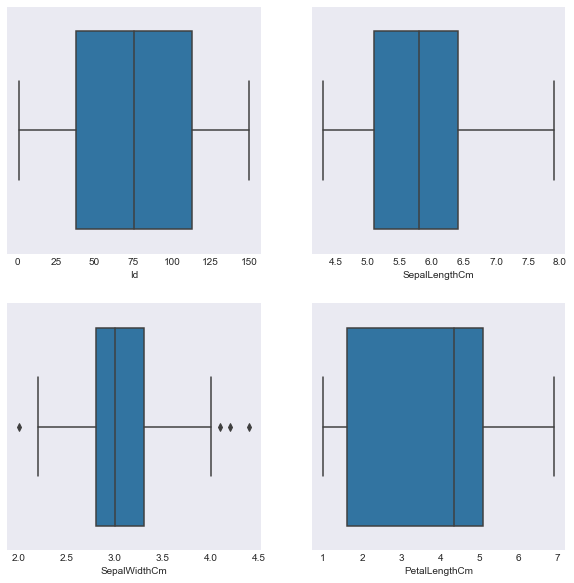

In [24]:
plt.figure(figsize = (10,10))
feature = iris.columns[:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(iris[i[1]])

In [25]:
q1 = iris['SepalWidthCm'].quantile(0.01)
q4 = iris['SepalWidthCm'].quantile(0.99)

iris['SepalWidthCm'][iris['SepalWidthCm']<= q1] = q1
iris['SepalWidthCm'][iris['SepalWidthCm']>= q4] = q4

## Clustering

In [26]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [27]:
hopkins(iris.drop('Id', axis = 1))

0.8674581984849769

<font color=green>We can see that the value is between {0.8, ..., 0.99}, so the dataset has a high tendency to cluster

###  Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(iris.drop('Id', axis = 1))
df1

array([[-9.00681170e-01,  1.05447769e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.25943021e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.46225265e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.10141122e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.29056183e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.99881426e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.18393550e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.18393550e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.62027163e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.10141122e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.52664598e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.18393550e-01, -1.22754100e+00,
      

In [29]:
df1 = pd.DataFrame(df1, columns = iris.columns[1:])
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.054478,-1.341272,-1.312977
1,-1.143017,-0.125943,-1.341272,-1.312977
2,-1.385353,0.346225,-1.398138,-1.312977
3,-1.506521,0.110141,-1.284407,-1.312977
4,-1.021849,1.290562,-1.341272,-1.312977


## <font color=black>K-Mean Clustering

### <font color=black>Finding the Optimal Number of Clusters for KMeans Clustering :¶
### <font color=orange>Elbow Method (SSD - Sum of Squared Distance)

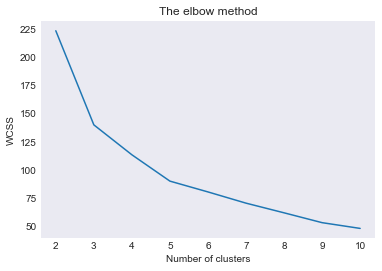

In [30]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd=[]
for k in range(2,11):
  kmean = KMeans(n_clusters=k).fit(df1)
  ssd.append([k,kmean.inertia_])

plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

<font color=green>You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '3'.

In [31]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
x = iris.iloc[:, [1, 2, 3 , 4]].values
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [32]:
df_kmean = iris.copy()

In [33]:
label  = pd.DataFrame(y_kmeans, columns= ['label'])
label.head()

,label
0,1
1,1
2,1
3,1
4,1


In [34]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [35]:
df_kmean.label.value_counts()

2    62
1    50
0    38
Name: label, dtype: int64

- <font color=green> We can see that Cluster 0 is having 38 Data points
- <font color=green>Cluster 1 is having 50 data points
- <font color=green>Cluster 2 is having 62 data points



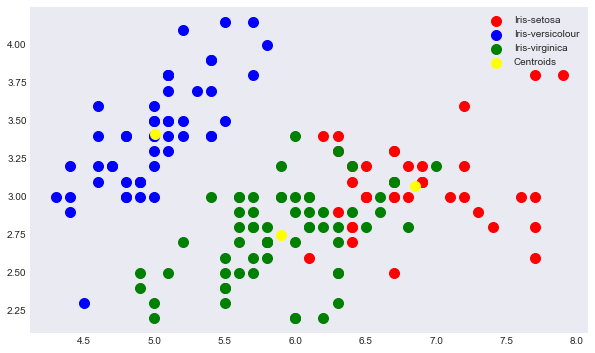

In [36]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

## Clsuter Profiling

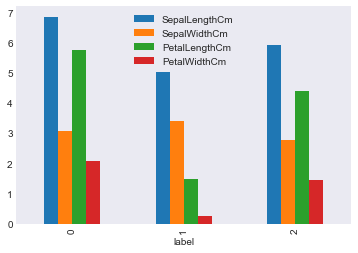

In [37]:
# Making sense out of the clsuters

df_kmean.drop('Id', axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.show()

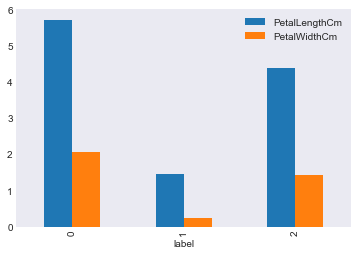

In [38]:
df_kmean.drop(['Id', 'SepalLengthCm', 'SepalWidthCm'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.show()

- Cluster 0 is having high sepal length and petal length
- Cluster 1 is having low petal width and petal length

## We can deduce that the dataset requires three ideal clusters to be shown effectively.

## <font color = Teal> Thank You!!